In [391]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import bisect
from matplotlib import colors
from matplotlib.colorbar import ColorbarBase
%config InlineBackend.figure_format = 'retina'

## Question 1

In [268]:
data = dict(
    segment=['Segment 1','Segment 2','Segment 3','Segment 4','Segment 5','Segment 6','Segment 7'],
    us=[16,7,10,10,10,32,15],
    our=[9,10,15,18,17,20,11])

customer = pd.DataFrame(data)
customer = customer[['us','our']].T
customer.columns = data['segment']

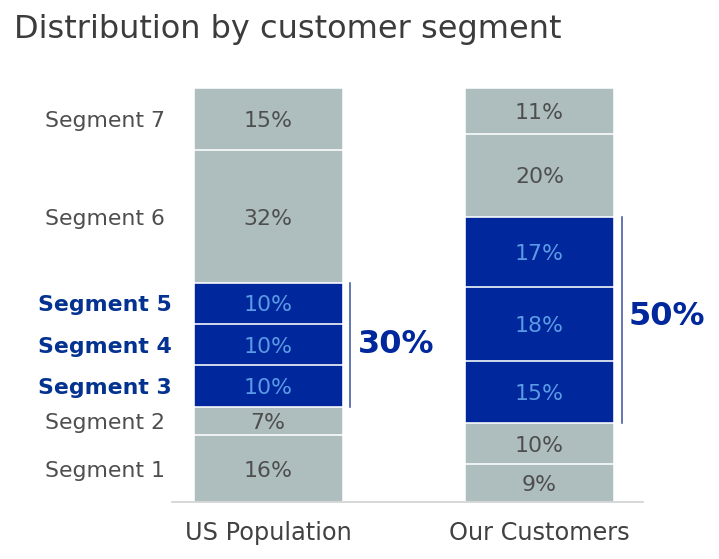

In [269]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

for i, columns in enumerate(reversed(customer.columns)):
    bar_color = ('#00279B' if i in [2,3,4] else '#AEBDBE')
    bar_height = customer.loc[:, :columns].sum(axis=1)
    label_height = bar_height - customer.loc[:, columns] / 2 - 1.8
    label_color = ('#5B9AE5' if i in [2,3,4] else '#4E4E4E')
    label_weight = ('bold' if i in [2,3,4] else 'regular')
    axis_color = ('#033290' if i in [2,3,4] else '#4E4E4E')
    
    # draw segments
    ax.bar(customer.index, bar_height
          ,color=bar_color, edgecolor='white', linewidth=0.8
          ,width=0.55)
    
    # label segments
    for i, height in enumerate(label_height):
        ax.text(i, height, str(customer.loc[:, columns][i]) + '%' , 
                ha='center', color=label_color, 
                fontdict=dict(fontsize=11
               ,weight='light'))
    # label axis        
    ax.text(-0.6, label_height[0], columns, 
        ha='center', color=axis_color, 
        fontdict=dict(fontsize=11
        ,weight=label_weight))
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#CDD0CE')
ax.get_yaxis().set_visible(False)
ax.tick_params(length=6, color='white')

ax.set_xticks([0,1])
ax.set_xticklabels(['US Population','Our Customers']
                   ,fontsize=12
                  ,color='#414141', fontweight='medium')

# draw annotations

ax.plot([0.55/2*1.1,0.55/2 *1.1], [23,53], c='#415BA3', lw=.8)
ax.plot([0.55/2*1.1+1,0.55/2 *1.1+1], [19,69], c='#415BA3', lw=.8)
ax.text(0.55/2*1.2, 36, '30%', ha='left', 
        color='#00279B', fontsize=16, fontweight='bold')
ax.text(0.55/2*1.2+1, 43, '50%', ha='left', 
        color='#00279B', fontsize=16, fontweight='bold')

# add title
ax.set_title('Distribution by customer segment' +' '*8
             ,loc='right' ,pad=15
            ,fontsize=16 ,color='#3C3C3C', fontweight='roman')

plt.tight_layout()
plt.show()

## Question 2

In [4]:
df_life = pd.read_csv("life-expectancy-at-birth-total-years.csv")

df_life.head()

,Entity,Code,Year,"Life expectancy at birth, total (years)"
0,Afghanistan,AFG,1960,32.292
1,Afghanistan,AFG,1961,32.742
2,Afghanistan,AFG,1962,33.185
3,Afghanistan,AFG,1963,33.624
4,Afghanistan,AFG,1964,34.060


In [10]:
# Rename Life Expectancy column for easier reading

df_life = df_life.rename(columns={"Life expectancy at birth, total (years)": "Life Expectancy"})

df_life

,Entity,Code,Year,Life Expectancy
0,Afghanistan,AFG,1960,32.292
1,Afghanistan,AFG,1961,32.742
2,Afghanistan,AFG,1962,33.185
3,Afghanistan,AFG,1963,33.624
4,Afghanistan,AFG,1964,34.060
...,...,...,...,...
13742,Zimbabwe,ZWE,2012,56.516
13743,Zimbabwe,ZWE,2013,58.053
13744,Zimbabwe,ZWE,2014,59.360
13745,Zimbabwe,ZWE,2015,60.398


In [26]:
df_life.loc[df_life['Entity'].isin(['Egypt','Belarus', 'Finland', 'Timor'])]

,Entity,Code,Year,Life Expectancy
912,Belarus,BLR,1960,67.708098
913,Belarus,BLR,1961,68.212659
914,Belarus,BLR,1962,68.635829
915,Belarus,BLR,1963,68.992073
916,Belarus,BLR,1964,69.289927
...,...,...,...,...
12488,Timor,TLS,2012,67.805000
12489,Timor,TLS,2013,68.033000
12490,Timor,TLS,2014,68.285000
12491,Timor,TLS,2015,68.569000


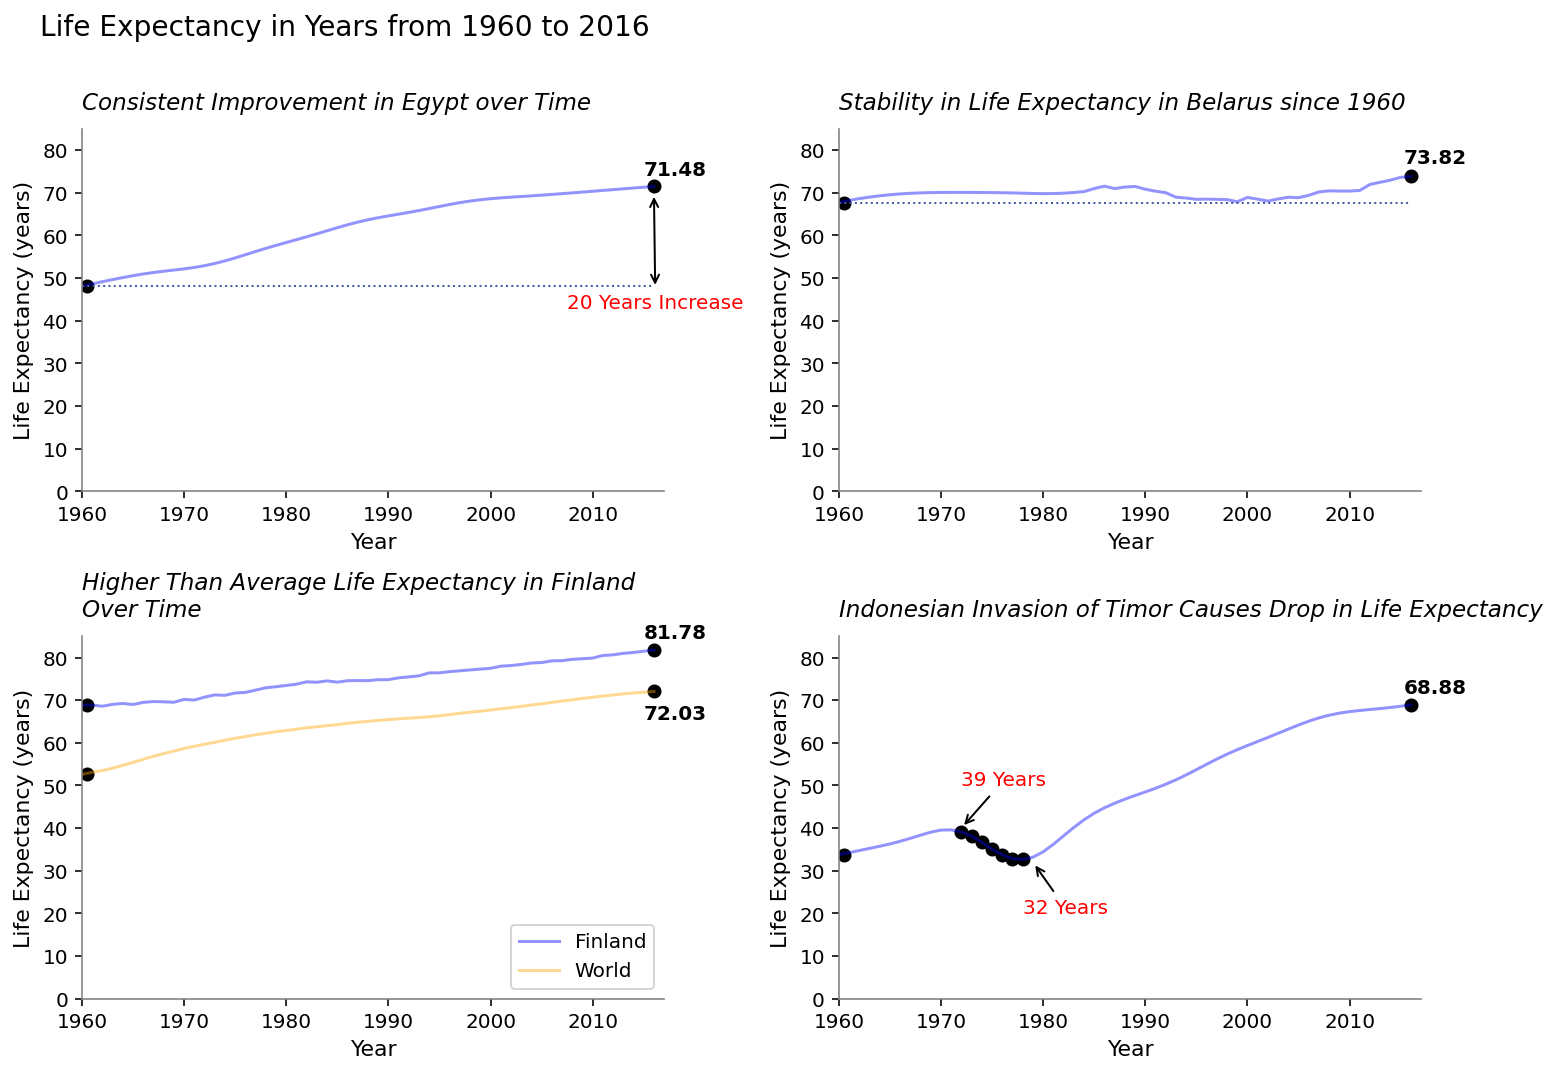

In [272]:
# Putting 4 graphs of 4 countries together

lg = '#808080'
def axis_plot(ax):
    ax.set_ylim(0, 85)
    ax.set_xlim(1960, 2017)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_color(lg)
    ax.spines["left"].set_color(lg)
    
    ax.set_ylabel("Life Expectancy (years)", fontsize=11)
    ax.set_xlabel("Year", fontsize=11)
    return ax

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12,8),
                                            gridspec_kw={'hspace': 0.4, 'wspace':0.3})


# Egypt
df_life[df_life['Entity'] == 'Egypt'].plot(x='Year', y='Life Expectancy', color='blue', alpha=0.425,
                                           ax=axis_plot(ax1), legend=False)
years_egypt = [1960.5, 2016]
values_egypt = [48.056, 71.484]
ax1.scatter(years_egypt, values_egypt, color="black")
ax1.set_title("Consistent Improvement in Egypt over Time", style='italic', fontsize=11.5,loc='left', pad=10)
ax1.text(0.45,0.84,'71.48',transform=fig.transFigure, fontsize=10, fontweight='bold')
ax1.plot([1960,2016], [48.05,48.05], ':', c='#415BA3', lw=1)
ax1.annotate("20 Years Increase", xy=(2016, 70), xytext=(2007.5, 43), color='red', arrowprops=dict(arrowstyle="<->"))


# Belarus
df_life[df_life['Entity'] == 'Belarus'].plot(x='Year', y='Life Expectancy', color='blue', alpha=0.425,
                                             ax=axis_plot(ax2), legend=False)
years_bel = [1960.5, 2016]
values_bel = [67.708, 73.826]
ax2.scatter(years_bel, values_bel, color="black")
ax2.set_title("Stability in Life Expectancy in Belarus since 1960", 
              style='italic', fontsize=11.5, loc='left', pad=10)
ax2.text(0.89,0.85,'73.82',transform=fig.transFigure, fontsize=10, fontweight='bold')
ax2.plot([1960,2016], [67.7,67.7], ':', c='#415BA3', lw=1)



# Finland
df_life[df_life['Entity'] == 'Finland'].plot(x='Year', y='Life Expectancy', color='blue', alpha=0.425,
                                             label='Finland',ax=axis_plot(ax3))
df_life[df_life['Entity'] == 'World'].plot(x='Year', y='Life Expectancy', linestyle='-', color='orange',alpha=0.425,
                                             label='World',ax=axis_plot(ax3))
years_fin = [1960.5, 2016]
values_fin = [68.819, 81.78]
years_world= [1960.5, 2016]
values_world = [52.57, 72.03]
ax3.scatter(years_fin, values_fin, color="black")
ax3.scatter(years_world, values_world, color="black")
ax3.set_title("Higher Than Average Life Expectancy in Finland\nOver Time", 
              style='italic', fontsize=11.5,loc='left', pad=10)
ax3.text(0.45,0.4375,'81.78',transform=fig.transFigure, fontsize=10, fontweight='bold')
ax3.text(0.45,0.3675,'72.03',transform=fig.transFigure, fontsize=10, fontweight='bold')
ax3.legend(loc='lower right')


# Timor
df_life[df_life['Entity'] == 'Timor'].plot(x='Year', y='Life Expectancy', color='blue', alpha=0.425,
                                           ax=axis_plot(ax4), legend=False)
years_timor = [1960.5, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 2016]
values_timor = [33.729, 39.085, 38.077, 36.659, 35.092, 33.714, 32.826, 32.628, 68.88]

ax4.scatter(years_timor, values_timor, color='black')
ax4.set_title("Indonesian Invasion of Timor Causes Drop in Life Expectancy", style='italic',
              fontsize=11.5, loc = 'left', pad=10)
ax4.text(0.89,0.39,'68.88',transform=fig.transFigure, fontsize=10, fontweight='bold')
ax4.annotate("39 Years", xy=(1972, 40), xytext=(1972, 50), color='red', 
             arrowprops=dict(arrowstyle="->"))
ax4.annotate("32 Years", xy=(1979, 32), xytext=(1978, 20), color='red', 
             arrowprops=dict(arrowstyle="->"))


plt.suptitle("Life Expectancy in Years from 1960 to 2016         ", horizontalalignment = 'right',fontsize=14)
plt.show()

## Question 3

In [286]:
df_brazil = pd.read_csv("brazil_excess_deaths.csv")[['country','region','month','excess_deaths_pct_change']]

df_brazil.head(5)

,country,region,month,excess_deaths_pct_change
0,Brazil,Recife,1,0.308805
1,Brazil,Recife,2,0.303300
2,Brazil,Recife,3,0.295630
3,Brazil,Recife,4,0.845450
4,Brazil,Recife,5,1.945131


In [289]:
region_order = np.array(['São Paulo','Rio de Janeiro', 'Manaus', 'Recife',  'Fortaleza',])
df_brazil.region = pd.Categorical(df_brazil.region, region_order)
df_brazil = df_brazil.sort_values('region')

In [369]:
# define color assignment function
def color_assignment(value):
    i = bisect.bisect([0, 0.25, 0.5, 1, 2], value)
    color = {0: '#E8F0F4',
             1: '#FFEDD4',
             2: '#FFC57E',
             3: '#FF804C',
             4: '#E93C28',
             5: '#B10000'}

    return color[i]

# add column mapping excess pct change to hex color
df_brazil['color_hex'] = df_brazil['excess_deaths_pct_change'].apply(color_assignment)
df_brazil[df_brazil.month ==7]

,country,region,month,excess_deaths_pct_change,color_hex
34,Brazil,São Paulo,7,0.369215,#FFC57E
27,Brazil,Rio de Janeiro,7,-0.023321,#E8F0F4
13,Brazil,Manaus,7,0.063158,#FFEDD4
6,Brazil,Recife,7,0.523522,#FF804C
20,Brazil,Fortaleza,7,0.499261,#FFC57E


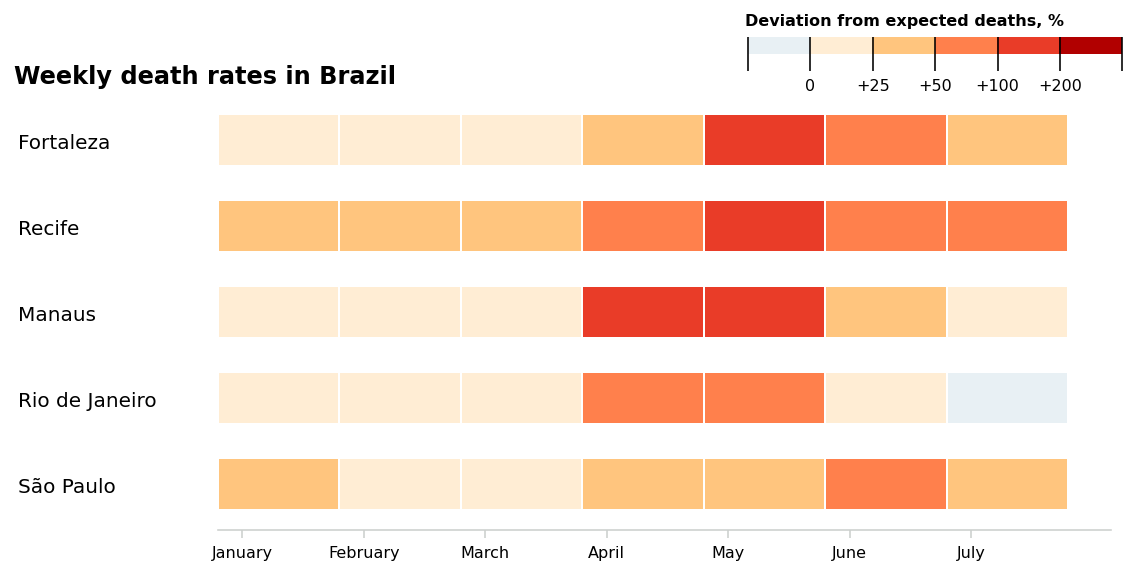

In [503]:
fig,ax = plt.subplots(1,1, figsize=(8,4)) 

regions = df_brazil.region.unique()
num_regions = len(regions)
ones = np.ones(num_regions)

for month in range(7,0, -1):
    
    ax.barh(regions, month * ones
            ,height=0.6
            ,color=df_brazil[df_brazil.month == month]['color_hex'], 
            align='center',
            edgecolor='white')
    

# hide spines   
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#CDD0CE')
ax.tick_params(length=4, color='#CDD0CE')

# configure y-axis alignment
ax.set_yticks(np.linspace(0,4,5))
ax.set_yticklabels(regions, ha='left')
ax.get_yaxis().set_tick_params(pad=100)
ax.yaxis.set_tick_params(length=0)

# configure x-axis alignment
ax.set_xticks(np.linspace(0.2, 6.2, 7))
ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July']
                   ,fontsize=8
                  ,ha='center')

ax.set_title("Weekly death rates in Brazil" + " "*32, horizontalalignment='right', fontweight='bold')


# Adding color bar
colors = ['#E8F0F4','#FFEDD4', '#FFC57E','#FF804C','#E93C28','#B10000']
bounds = [1,2,3,4,5,6,7]
boundaries = [0, '0', '+25', '+50', '+100', '+200']

ax_c = fig.add_axes([0.585, 0.95, 0.325, 0.03])
cmap = mpl.colors.ListedColormap(colors)

cb2 = ColorbarBase(ax_c, cmap=cmap,
                   boundaries=bounds,
                   ticks=bounds,
                   label=boundaries,
                   orientation='horizontal')
cb2.set_label('Deviation from expected deaths, %' + ' '*11, fontsize=8,fontweight='bold', labelpad=-40, y=45)
cb2.set_ticklabels(boundaries)
cb2.ax.tick_params(labelsize = 8, length = 17, direction = 'inout')
cb2.outline.set_visible(False)

for label in cb2.ax.xaxis.get_ticklabels()[:1]:
    label.set_visible(False)
    


plt.show()